In [210]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

In [211]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [213]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


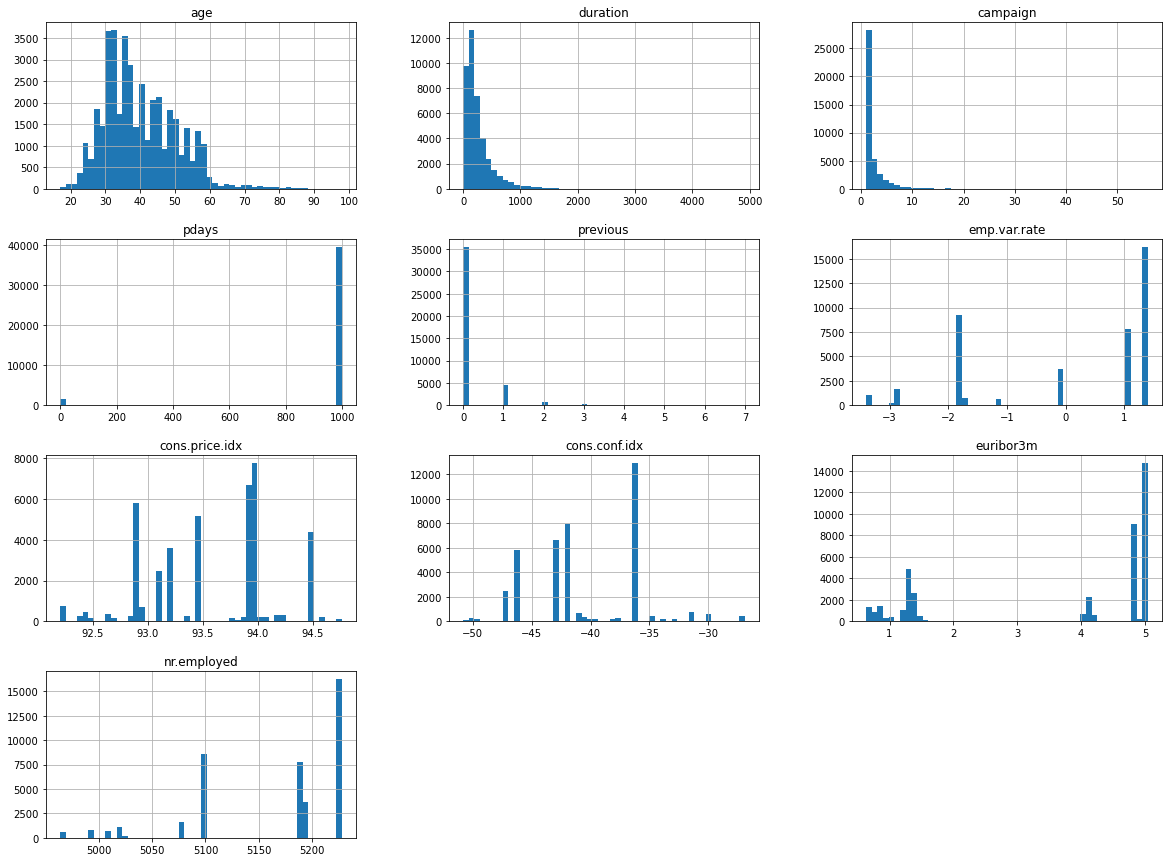

In [214]:
_ = df.hist(bins=50, figsize=(20,15))

In [215]:
le = LabelEncoder()
df['y'] = le.fit_transform(df["y"])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [216]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


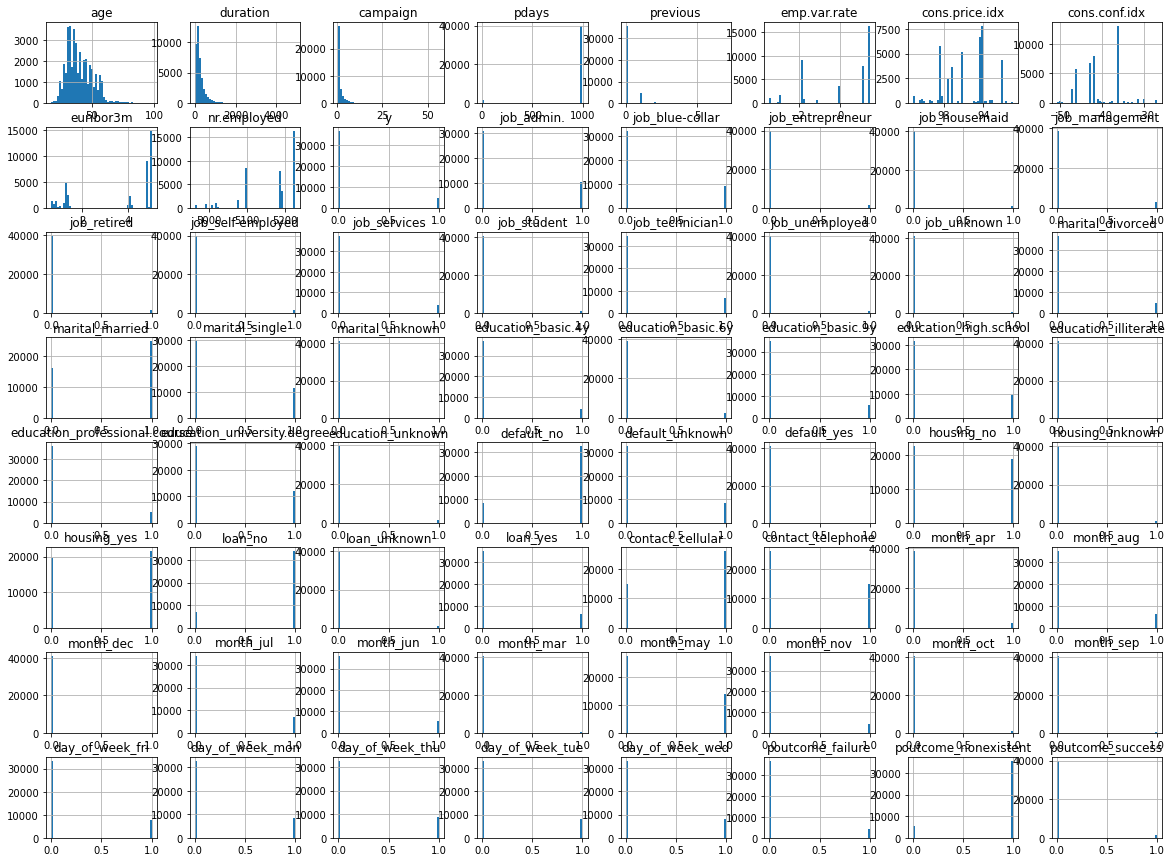

In [217]:
_ = df_dummies.hist(bins=50, figsize=(20,15))

In [218]:
del df_dummies['duration']
df_dummies

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [219]:
# Create separate training and test sets. we'll use the training set for steps 3--6
train_set, test_set = train_test_split(df_dummies, test_size=0.2, random_state=50,stratify = df_dummies["y"])  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))


32950 8238


In [220]:
X_train = train_set.copy()

X_train.drop("y",axis=1, inplace=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 38445 to 7742
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  int64  
 1   campaign                       32950 non-null  int64  
 2   pdays                          32950 non-null  int64  
 3   previous                       32950 non-null  int64  
 4   emp.var.rate                   32950 non-null  float64
 5   cons.price.idx                 32950 non-null  float64
 6   cons.conf.idx                  32950 non-null  float64
 7   euribor3m                      32950 non-null  float64
 8   nr.employed                    32950 non-null  float64
 9   job_admin.                     32950 non-null  uint8  
 10  job_blue-collar                32950 non-null  uint8  
 11  job_entrepreneur               32950 non-null  uint8  
 12  job_housemaid                  32950 non-nu

In [202]:
y_train = train_set['y'].copy()
y_train

38445    1
17713    0
30309    1
25951    0
29064    0
        ..
11470    0
18260    1
141      0
19789    0
7742     0
Name: y, Length: 32950, dtype: int32

In [206]:
clf = DummyClassifier(strategy ='stratified')
scores = cross_val_score(clf, X_processed, y, cv=10, scoring='f1')  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.11 +/- 0.01


In [224]:
clf = RandomForestClassifier(n_estimators=300, max_depth=6)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(acc))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.90 +/- 0.00


In [232]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.26 +/- 0.04


In [228]:
clf = RandomForestClassifier(n_estimators=400, max_depth=6, random_state=50)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.28 +/- 0.05


In [233]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6,random_state=60)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.28 +/- 0.04


In [234]:
clf = RandomForestClassifier(n_estimators=750, max_depth=6,random_state=60)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=750, random_state=60)

In [235]:
import pickle as pkl

outp = open('model.pkl', 'wb')
pkl.dump(clf, outp, -1)  # where clf is your classifier
outp.close()

In [236]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)
print(indices)

[35 29 24 12 40 37 11 26 19 13 20 15 21 25 32 16 41 39  9 38 36 30 18 28
 22 54 27 58 47 51 57 46 23 56 45 31 14 10 17 34 55 33  1 48 53 44 43 42
 50 52 59 49 60  0  3  5  6  4 61  2  7  8]


In [237]:

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))


Feature ranking:
1. unknown (0.000000)
2. university.degree (0.000069)
3. basic.6y (0.000233)
4. retired (0.000394)
5. cellular (0.000419)
6. no (0.000435)
7. management (0.000471)
8. high.school (0.000542)
9. divorced (0.000547)
10. self-employed (0.000550)
11. married (0.000578)
12. student (0.000656)
13. single (0.000685)
14. basic.9y (0.000685)
15. unknown (0.000710)
16. technician (0.000737)
17. telephone (0.000804)
18. yes (0.000844)
19. entrepreneur (0.000867)
20. unknown (0.000868)
21. yes (0.000897)
22. unknown (0.000900)
23. unknown (0.000915)
24. professional.course (0.001106)
25. unknown (0.001143)
26. thu (0.001174)
27. illiterate (0.001199)
28. nonexistent (0.001256)
29. mar (0.001291)
30. sep (0.001293)
31. failure (0.001369)
32. jun (0.001473)
33. basic.4y (0.001560)
34. wed (0.001560)
35. jul (0.001604)
36. no (0.001995)
37. services (0.002521)
38. housemaid (0.002988)
39. unemployed (0.003221)
40. no (0.003377)
41. tue (0.003591)
42. yes (0.003925)
43. duration (0.004

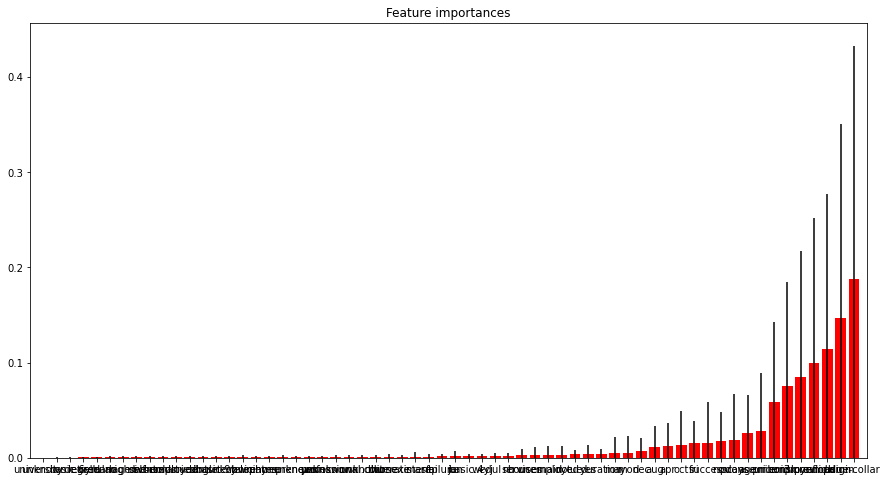

In [238]:
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feat_names)[indices])
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

In [239]:
X_test = test_set.copy()

X_test.drop("y",axis=1, inplace=True)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8238 entries, 10868 to 22303
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            8238 non-null   int64  
 1   campaign                       8238 non-null   int64  
 2   pdays                          8238 non-null   int64  
 3   previous                       8238 non-null   int64  
 4   emp.var.rate                   8238 non-null   float64
 5   cons.price.idx                 8238 non-null   float64
 6   cons.conf.idx                  8238 non-null   float64
 7   euribor3m                      8238 non-null   float64
 8   nr.employed                    8238 non-null   float64
 9   job_admin.                     8238 non-null   uint8  
 10  job_blue-collar                8238 non-null   uint8  
 11  job_entrepreneur               8238 non-null   uint8  
 12  job_housemaid                  8238 non-nul

In [240]:
y_test = test_set['y'].copy()
y_test

10868    0
29141    0
23977    0
33175    0
19349    0
        ..
36916    0
34585    0
17268    0
3556     0
22303    0
Name: y, Length: 8238, dtype: int32

In [241]:
# Predict
test_predictions = clf.predict(X_test)
# What's the accuracy on the test set?
acc(y_test, test_predictions)

0.8998543335761107

In [251]:
test_set['Predicted']=test_predictions
test_set.info()
test_set.to_csv('testset.csv', index=False, float_format='%.8g')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8238 entries, 10868 to 22303
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            8238 non-null   int64  
 1   campaign                       8238 non-null   int64  
 2   pdays                          8238 non-null   int64  
 3   previous                       8238 non-null   int64  
 4   emp.var.rate                   8238 non-null   float64
 5   cons.price.idx                 8238 non-null   float64
 6   cons.conf.idx                  8238 non-null   float64
 7   euribor3m                      8238 non-null   float64
 8   nr.employed                    8238 non-null   float64
 9   y                              8238 non-null   int32  
 10  job_admin.                     8238 non-null   uint8  
 11  job_blue-collar                8238 non-null   uint8  
 12  job_entrepreneur               8238 non-nul

C:\Users\AJ\AppData\Local\Temp/ipykernel_24800/1105267641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predicted']=test_predictions


In [105]:
features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month","day_of_week","poutcome" ]
df[features].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
13217,management,single,university.degree,no,no,no,cellular,jul,wed,nonexistent
11362,technician,married,university.degree,unknown,yes,no,telephone,jun,thu,nonexistent
2609,technician,married,university.degree,no,yes,yes,telephone,may,tue,nonexistent
19450,admin.,married,university.degree,no,no,no,cellular,aug,thu,nonexistent
34185,technician,single,high.school,no,yes,no,cellular,may,wed,nonexistent


In [106]:
df = train_set.copy()
# Most algorithms cannot work with missing values. Three main ways to deal with them:
# 1. Drop rows
# 2. Drop features with NaNs
# 3. Fill missing values
# As we have very few missing values, let's drop the rows
print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))
# Separate features from outcomes
y_df = df['y'].copy()
X_df = df.copy()

Number of rows before dropping NaNs: 26360
Number of rows after dropping NaNs: 26360


In [107]:
# We previously observed that some of the features were categorical. 
# Two main ways to deal with these: OrdinalEncoder() or OneHotEncoding()

# Let's use OneHotEncoding for the categories ('Category', 'Paid', 'Type')
# As we will later want to transform the test set, let's follow good practice and create a custom transformer for a sklearn pipeline

# This is an example of how it would be done. Since this is a very simple transformation, there's a better way of doing it
# using ColumnTransformer. We show it below

class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features)

In [108]:
cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month","day_of_week","poutcome"]

encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = encoder.transform(X_df)
X_oho

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
13217,31,645,1,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
11362,30,49,2,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,1,0,0,0,1,0
2609,36,232,4,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,0,0,0,0,1,0,0,1,0
19450,36,187,1,999,0,1.4,93.444,-36.1,4.968,5228.1,...,0,0,0,0,1,0,0,0,1,0
34185,33,446,3,999,0,-1.8,92.893,-46.2,1.281,5099.1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4839,58,187,5,999,0,1.1,93.994,-36.4,4.858,5191.0,...,0,0,0,0,0,0,1,0,1,0
35560,35,169,1,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,0,0,1,0,0,0,0,1,0
2199,31,456,6,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
28615,30,244,3,999,0,-1.8,93.075,-47.1,1.415,5099.1,...,0,0,0,0,0,0,1,0,1,0


In [109]:
# Let's also look at standardising some of the numerical features
num_features = ['age',"duration","campaign","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

# Use column transformer: numerical features will be standardised; categorical features will be transformed with OHO

# We can use a ColumnTransformer to transform only some types of columns in different ways
colTransformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
    )

X_processed = colTransformer.fit_transform(X_df)
X_processed.shape

(26360, 64)

In [110]:
X_processed[0,:]

array([-8.65472521e-01,  1.47461344e+00, -5.65930697e-01,  5.90069631e-01,
       -4.70560015e-01,  7.71976076e-01,  8.43618701e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

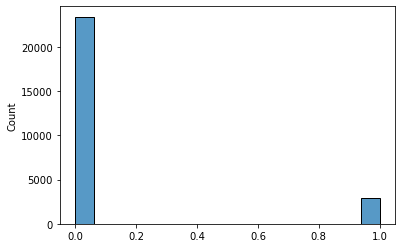

In [112]:
y = y_df.values
_ = sns.histplot(y, kde=False)

In [113]:
from sklearn.metrics import f1_score 
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_processed, y)
print("Dummy ACC: %.2f" % f1_score(y, dummy_clf.predict(X_processed)))

Dummy ACC: 0.10


In [114]:
from sklearn.metrics import f1_score 
dummy_clf = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=50)
dummy_clf.fit(X_processed, y)
print("RF ACC: %.2f" % f1_score(y, dummy_clf.predict(X_processed)))

RF ACC: 0.71


In [117]:
clf=RandomForestClassifier(n_estimators=300,max_depth=6)
cross_val_score(
   clf,X_processed, y,
    scoring=make_scorer(f1_score, average='weighted'),cv=10).mean()

1.0

In [118]:
clf=RandomForestClassifier(n_estimators=250,max_depth=6)
cross_val_score(
   clf,X_processed, y,
    scoring=make_scorer(f1_score, average='weighted'),cv=10).mean()

1.0

In [119]:
clf=RandomForestClassifier(n_estimators=1000,max_depth=8, random_state=60)
cross_val_score(
   clf,X_processed, y,
    scoring=make_scorer(f1_score, average='weighted'),cv=10).mean()

1.0

In [120]:
clf=RandomForestClassifier(n_estimators=300,max_depth=12, random_state=60)
cross_val_score(
   clf,X_processed, y,
    scoring=make_scorer(f1_score, average='weighted'),cv=10).mean()

1.0

In [128]:
# Fit the model
clf.fit(X_processed, y)

# Let's see the feature importances for our classifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Let's get the attibute names:
extra_attribs = ['pdays', 'previous']  # the ones we didn't modify in the transformer
cat_encoder = colTransformer.named_transformers_['cat']
cat_oho_attributes = oho_categories = [item for sublist in cat_encoder.categories_ for item in sublist]
feat_names = num_features + cat_oho_attributes + extra_attribs

# Print the feature ranking
print("Feature ranking:")
for f in range(X_processed.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))



[63  1  6  5 60 59 62  4  3  0 61  2 58 41 50 47 40 57 48 53 29 42 55 54
 34 21 36 20 12 26 46 56  7 52 16 28 31 39 37  8 15 32 25 51 19 23 30 24
 14 11 49 13 43 45  9 17 35 38 10 18 44 22 27 33]
Feature ranking:


IndexError: list index out of range

In [122]:
# Let's get the attibute names:
extra_attribs = ["pdays","previous"]  # the ones we didn't modify in the transformer
cat_encoder = colTransformer.named_transformers_['cat']
cat_oho_attributes = oho_categories = [item for sublist in cat_encoder.categories_ for item in sublist]
feat_names = num_features + cat_oho_attributes + extra_attribs
feat_names

['age',
 'duration',
 'campaign',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown',
 'divorced',
 'married',
 'single',
 'unknown',
 'basic.4y',
 'basic.6y',
 'basic.9y',
 'high.school',
 'illiterate',
 'professional.course',
 'university.degree',
 'unknown',
 'no',
 'unknown',
 'yes',
 'no',
 'unknown',
 'yes',
 'no',
 'unknown',
 'yes',
 'cellular',
 'telephone',
 'apr',
 'aug',
 'dec',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep',
 'fri',
 'mon',
 'thu',
 'tue',
 'wed',
 'failure',
 'nonexistent',
 'success',
 'pdays',
 'previous']

In [126]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X_processed.shape[1]):
    print("%d. %s (%f)" % (f , feat_names[indices[f-1]],  importances[indices[f-1]]))

Feature ranking:
0. yes (0.000000)


IndexError: list index out of range

In [87]:
(X_processed.shape[1])

104